In [2]:
import numpy as np
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import networkx as nx
import matplotlib.pyplot as plt

init_notebook_mode(connected=True)

In [3]:
def read_input(input_file='test.txt'):
    data_out = []
    with open(input_file, 'r') as f:
        data = f.read().splitlines()
        for coords in data:
            coords = coords.split(',')
            data_out.append(complex(int(coords[0]), int(coords[1])))

    return np.array(data_out)

In [4]:
data = read_input()
data

array([5.+4.j, 4.+2.j, 4.+5.j, 3.+0.j, 2.+1.j, 6.+3.j, 2.+4.j, 1.+5.j,
       0.+6.j, 3.+3.j, 2.+6.j, 5.+1.j])

In [4]:
# create a set of all possible complex number permutations. coefficients for both x and y are all natural numbers 0 inlcuded.
def generate_set(min_val=0, max_val=6):
    return set([complex(x, y) for x in range(min_val, max_val+1) for y in range(min_val, max_val+1)])

In [5]:
all_nums = generate_set()
all_nums

{(1+0j),
 (1+1j),
 (1+2j),
 (1+3j),
 (1+4j),
 (1+5j),
 (1+6j),
 (2+0j),
 (2+1j),
 (2+2j),
 (2+3j),
 (2+4j),
 (2+5j),
 (2+6j),
 (3+0j),
 (3+1j),
 (3+2j),
 (3+3j),
 (3+4j),
 (3+5j),
 (3+6j),
 (4+0j),
 (4+1j),
 (4+2j),
 (4+3j),
 (4+4j),
 (4+5j),
 (4+6j),
 (5+0j),
 (5+1j),
 (5+2j),
 (5+3j),
 (5+4j),
 (5+5j),
 (5+6j),
 (6+0j),
 (6+1j),
 (6+2j),
 (6+3j),
 (6+4j),
 (6+5j),
 (6+6j),
 0j,
 1j,
 2j,
 3j,
 4j,
 5j,
 6j}

In [5]:



def plot_mem(valid_coords: np.ndarray, corrupted_mem: np.ndarray, start: complex, finish: complex, dim_start: complex, dim_end: complex):
    """
    Plots blockades, boxes, and robot positions on a grid using Plotly for interactivity.

    Parameters:
        valid_coords (np.ndarray): Array of complex numbers representing blockade positions.
        boxes (np.ndarray): Array of complex numbers representing box positions.
        start (complex): Complex number representing the robot's position.
        dim_start (complex): Starting point defining plot's lower bounds.
        dim_end (complex): Ending point defining plot's upper bounds.
    """
    # Create trace for blockades
    trace_blockades = go.Scatter(
        x=valid_coords.real,
        y=valid_coords.imag,
        mode='markers',
        name='Valid Path',
        marker=dict(
            symbol='square',      # Valid Plotly marker symbol
            size=12,
            color='blue'
        )
    )

    # Create trace for boxes
    trace_boxes = go.Scatter(
        x=corrupted_mem.real,
        y=corrupted_mem.imag,
        mode='markers',
        name='Corrupted mem',
        marker=dict(
            symbol='square',      # Valid Plotly marker symbol
            size=12,
            color='red'
        )
    )

    # Create trace for robot
    trace_start = go.Scatter(
        x=[start.real],
        y=[start.imag],
        mode='markers',
        name='start',
        marker=dict(
            symbol='star',        # Valid Plotly marker symbol
            size=16,
            color='red'
        )
    )

    # Create trace for robot
    trace_finish = go.Scatter(
        x=[finish.real],
        y=[finish.imag],
        mode='markers',
        name='finish',
        marker=dict(
            symbol='star',        # Valid Plotly marker symbol
            size=16,
            color='purple'
        )
    )

    # Define layout with specified dimensions
    layout = go.Layout(
        title='Memory Grid Visualization',
        xaxis=dict(
            title='Real Part',
            range=[dim_start.real - 1, dim_end.real + 1],
            zeroline=True
        ),
        yaxis=dict(
            title='Imaginary Part',
            range=[dim_end.imag + 1, dim_start.imag - 1],
            zeroline=True
        ),
        showlegend=True,
        width=700,
        height=700
    )

    # Create figure with all traces
    fig = go.Figure(data=[trace_blockades, trace_boxes, trace_start, trace_finish], layout=layout)

    # Display the plot inline within the Jupyter Notebook
    iplot(fig)

In [7]:
# do a set difference between the set of all possible complex numbers and the set of numbers in the input data

valid_coords = all_nums - set(data)

valid_coords = np.array(list(valid_coords))
# plot the valid coordinates
plot_mem(valid_coords, data, 0+0j, 6+6j, 0+0j, 6+6j)

# ...#...
# ..#..#.
# ....#..
# ...#..#
# ..#..#.
# .#..#..
# #.#....



In [6]:
direction_map = {
    '>': 1 + 0j,   # Right
    '<': -1 + 0j,  # Left
    '^': 0 - 1j,   # Up
    'v': 0 + 1j    # Down
}

def find_all_connected_vertices(vertex: complex, coords: np.ndarray):
    directions = '<>v^'

    for direction in directions:
        if direction_map[direction] + vertex in coords:
                yield direction_map[direction] + vertex


In [7]:
def coords_list_to_graph(coords: np.ndarray, start: complex, end: complex):

    vertices = {}
    for coord in coords:
        vertices[coord] = set(find_all_connected_vertices(coord, coords))

    return vertices


In [10]:
graph = coords_list_to_graph(valid_coords, 0+0j, 6+6j)
graph

{0j: {1j, (1+0j)},
 (1+0j): {0j, (1+1j), (2+0j)},
 (2+0j): {(1+0j)},
 (4+0j): {(4+1j), (5+0j)},
 (5+0j): {(4+0j), (6+0j)},
 2j: {1j, 3j, (1+2j)},
 (1+2j): {2j, (1+1j), (1+3j), (2+2j)},
 (2+2j): {(1+2j), (2+3j), (3+2j)},
 (3+2j): {(2+2j), (3+1j)},
 (6+0j): {(5+0j), (6+1j)},
 (5+2j): {(5+3j), (6+2j)},
 4j: {3j, 5j, (1+4j)},
 (1+4j): {4j, (1+3j)},
 (6+2j): {(5+2j), (6+1j)},
 (3+4j): {(3+5j), (4+4j)},
 (4+4j): {(3+4j), (4+3j)},
 (6+4j): {(6+5j)},
 (1+6j): set(),
 (3+6j): {(3+5j), (4+6j)},
 (4+6j): {(3+6j), (5+6j)},
 (5+6j): {(4+6j), (5+5j), (6+6j)},
 (6+6j): {(5+6j), (6+5j)},
 1j: {0j, 2j, (1+1j)},
 (1+1j): {1j, (1+0j), (1+2j)},
 (3+1j): {(3+2j), (4+1j)},
 (4+1j): {(3+1j), (4+0j)},
 3j: {2j, 4j, (1+3j)},
 (1+3j): {3j, (1+2j), (1+4j), (2+3j)},
 (2+3j): {(1+3j), (2+2j)},
 (6+1j): {(6+0j), (6+2j)},
 (4+3j): {(4+4j), (5+3j)},
 (5+3j): {(4+3j), (5+2j)},
 5j: {4j},
 (2+5j): {(3+5j)},
 (3+5j): {(2+5j), (3+4j), (3+6j)},
 (5+5j): {(5+6j), (6+5j)},
 (6+5j): {(5+5j), (6+4j), (6+6j)}}

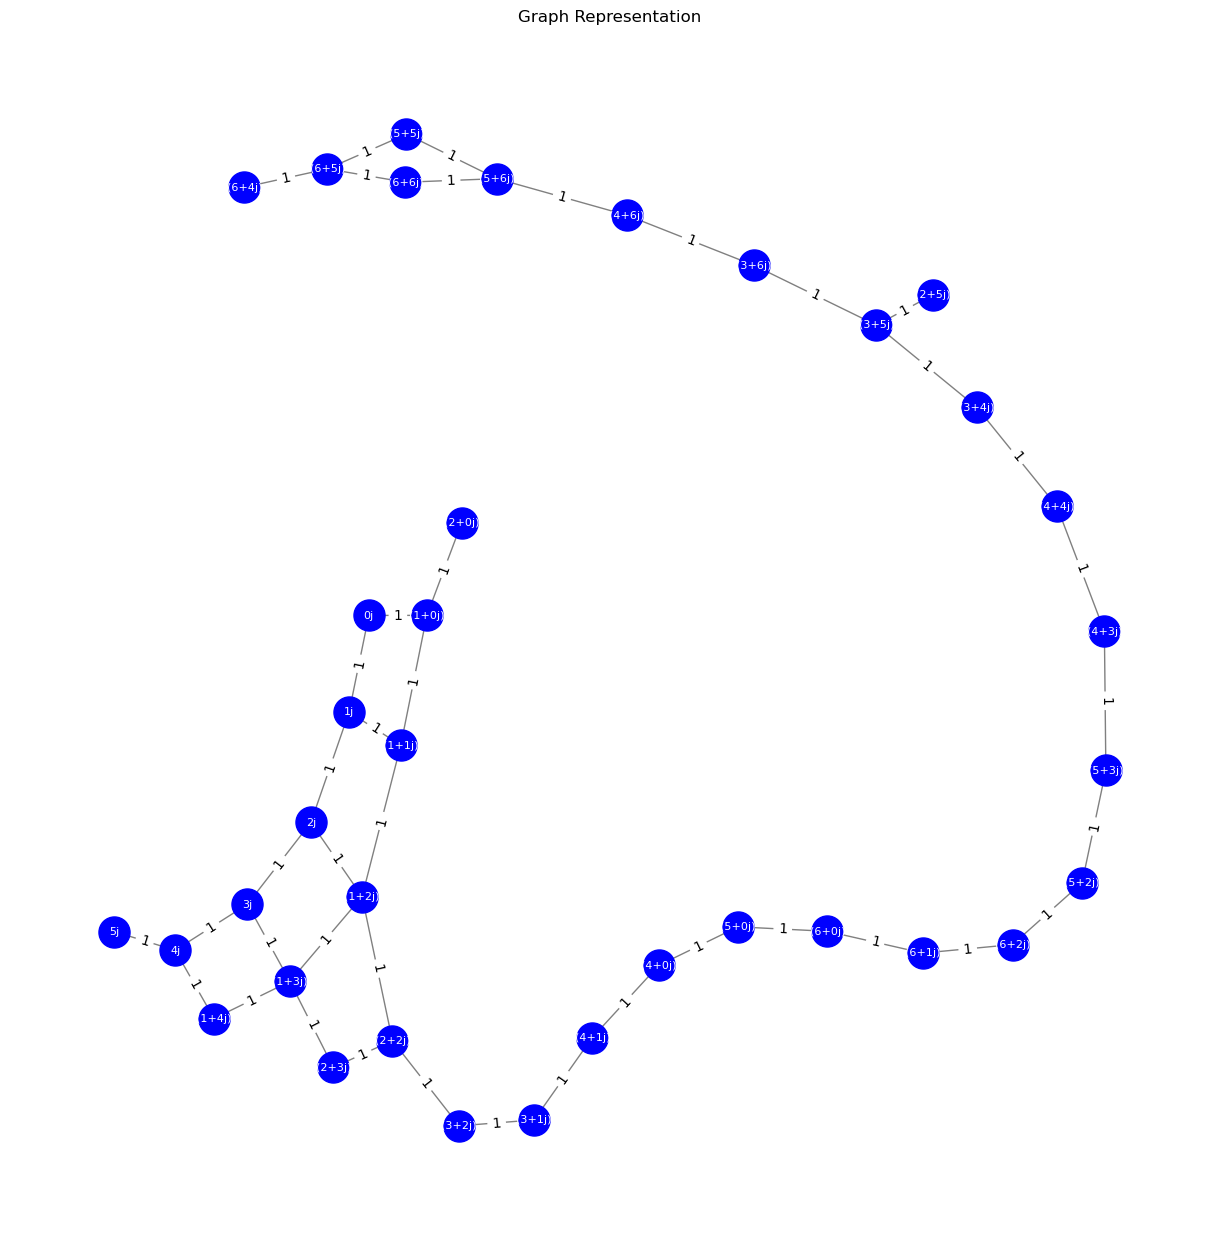

In [11]:
# Create a graph
G = nx.Graph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor, weight=1)  # Edge weight is 1

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="white", node_color="blue", edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

plt.title("Graph Representation")
plt.show()

In [8]:
def a_star_algorithm(graph, start, goal):
    """A* algorithm to find the shortest path in a graph."""
    import heapq

    # Priority queue to store (cost, current_node, path)
    open_set = []
    heapq.heappush(open_set, (0, start, [start]))

    # Cost dictionary to track the shortest known cost to each node
    cost_so_far = {start: 0}

    while open_set:
        current_cost, current_node, path = heapq.heappop(open_set)

        # If goal is reached, return the path and the cost
        if current_node == goal:
            return path, current_cost

        # Explore neighbors
        for neighbor in graph.neighbors(current_node):
            edge_weight = graph[current_node][neighbor]['weight']
            new_cost = cost_so_far[current_node] + edge_weight

            if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                cost_so_far[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(open_set, (priority, neighbor, path + [neighbor]))

    return None, float('inf')  # No path found

def heuristic(node, goal):
    """Heuristic function for A* algorithm. Using Manhattan distance."""
    return abs(node.real - goal.real) + abs(node.imag - goal.imag)

In [9]:
a_graph = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        a_graph.add_edge(node, neighbor, weight=1)


# Perform A* search
start = np.complex128(0+0j)
goal = np.complex128(6+6j)
path, cost = a_star_algorithm(a_graph, start, goal)

print(f"Shortest path: {path}")
print(f"Total cost: {cost}")


NameError: name 'graph' is not defined

In [32]:
min = 0+0j
max = 70+70j

obstacles = read_input('in.txt')
print(len(obstacles))

safe_data = np.array(list(generate_set(0, 70) - set(obstacles)))

plot_mem(safe_data, obstacles, min, max, min, max)

3450


In [33]:
graph = coords_list_to_graph(safe_data, min, max)
graph

{0j: {(1+0j)},
 (1+0j): {0j, (2+0j)},
 (2+0j): {(1+0j), (2+1j), (3+0j)},
 (3+0j): {(2+0j)},
 (6+0j): set(),
 (8+0j): {(8+1j), (9+0j)},
 (9+0j): {(8+0j), (10+0j)},
 (10+0j): {(9+0j), (11+0j)},
 (11+0j): {(10+0j), (12+0j)},
 (12+0j): {(11+0j)},
 (15+0j): set(),
 (17+0j): {(18+0j)},
 (18+0j): {(17+0j), (18+1j), (19+0j)},
 (19+0j): {(18+0j)},
 (22+0j): {(23+0j)},
 (23+0j): {(22+0j), (24+0j)},
 (24+0j): {(23+0j), (25+0j)},
 (25+0j): {(24+0j), (26+0j)},
 (26+0j): {(25+0j)},
 (28+0j): {(28+1j)},
 (30+0j): {(31+0j)},
 (31+0j): {(30+0j)},
 (34+0j): {(34+1j), (35+0j)},
 (35+0j): {(34+0j), (36+0j)},
 (36+0j): {(35+0j), (37+0j)},
 (37+0j): {(36+0j), (38+0j)},
 (38+0j): {(37+0j), (38+1j)},
 (40+0j): {(40+1j), (41+0j)},
 (41+0j): {(40+0j), (42+0j)},
 (42+0j): {(41+0j), (43+0j)},
 (43+0j): {(42+0j)},
 (45+0j): {(46+0j)},
 (46+0j): {(45+0j)},
 (48+0j): set(),
 (50+0j): {(50+1j)},
 (53+0j): set(),
 (55+0j): set(),
 (58+0j): {(59+0j)},
 (59+0j): {(58+0j)},
 (62+0j): {(63+0j)},
 (63+0j): {(62+0j), (64+0j

In [34]:
# Create a graph
G = nx.Graph()

# Add edges to the graph
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor, weight=1)  # Edge weight is 1

# Draw the graph
# pos = nx.spring_layout(G, seed=42)  # Layout for better visualization
# plt.figure(figsize=(12, 12))
# nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, font_color="white", node_color="blue", edge_color="gray")
# nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
#
# plt.title("Graph Representation")
# plt.show()

In [35]:
a_graph = nx.Graph()
for node, neighbors in graph.items():
    for neighbor in neighbors:
        a_graph.add_edge(node, neighbor, weight=1)


# Perform A* search
start = np.complex128(min)
goal = np.complex128(max)
path, cost = a_star_algorithm(a_graph, start, goal)

print(f"Shortest path: {path}")
print(f"Total cost: {cost}")


Shortest path: None
Total cost: inf


In [38]:
from functools import cache


@cache
def bruh(obstacles, min, max):
    for byte in range(2047, len(obstacles)):
        safe_data = np.array(list(generate_set(0, 70) - set(obstacles[:byte])))

        graph = coords_list_to_graph(safe_data, min, max)

        a_graph = nx.Graph()
        for node, neighbors in graph.items():
            for neighbor in neighbors:
                a_graph.add_edge(node, neighbor, weight=1)

        path, cost = a_star_algorithm(a_graph, start, goal)
        if not path:
            print(obstacles[byte-1])
            return

        print(f"Byte: {byte} - Cost: {cost}")

In [40]:
obstacles = tuple(obstacles)
print(len(obstacles))
bruh(obstacles, min, max)

3450
Byte: 2047 - Cost: 272.0
Byte: 2048 - Cost: 272.0
Byte: 2049 - Cost: 272.0
Byte: 2050 - Cost: 272.0
Byte: 2051 - Cost: 272.0
Byte: 2052 - Cost: 272.0
Byte: 2053 - Cost: 272.0
Byte: 2054 - Cost: 272.0
Byte: 2055 - Cost: 272.0
Byte: 2056 - Cost: 272.0
Byte: 2057 - Cost: 272.0
Byte: 2058 - Cost: 272.0
Byte: 2059 - Cost: 272.0
Byte: 2060 - Cost: 272.0
Byte: 2061 - Cost: 272.0
Byte: 2062 - Cost: 272.0
Byte: 2063 - Cost: 272.0
Byte: 2064 - Cost: 272.0
Byte: 2065 - Cost: 272.0
Byte: 2066 - Cost: 272.0
Byte: 2067 - Cost: 272.0
Byte: 2068 - Cost: 272.0
Byte: 2069 - Cost: 272.0
Byte: 2070 - Cost: 272.0
Byte: 2071 - Cost: 272.0
Byte: 2072 - Cost: 272.0
Byte: 2073 - Cost: 272.0
Byte: 2074 - Cost: 272.0
Byte: 2075 - Cost: 272.0
Byte: 2076 - Cost: 272.0
Byte: 2077 - Cost: 272.0
Byte: 2078 - Cost: 272.0
Byte: 2079 - Cost: 272.0
Byte: 2080 - Cost: 272.0
Byte: 2081 - Cost: 272.0
Byte: 2082 - Cost: 272.0
Byte: 2083 - Cost: 272.0
Byte: 2084 - Cost: 272.0
Byte: 2085 - Cost: 272.0
Byte: 2086 - Cost: 2